In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
df = pd.read_csv('data/LF/R13296612_SL140.csv')

In [3]:
df.shape

(14, 88)

In [4]:
df.head

<bound method NDFrame.head of       Geo_FIPS           Geo_GEOID              Geo_NAME  \
0   6037188201  14000US06037188201  Census Tract 1882.01   
1   6037188202  14000US06037188202  Census Tract 1882.02   
2   6037189101  14000US06037189101  Census Tract 1891.01   
3   6037189102  14000US06037189102  Census Tract 1891.02   
4   6037189201  14000US06037189201  Census Tract 1892.01   
5   6037189202  14000US06037189202  Census Tract 1892.02   
6   6037189300  14000US06037189300     Census Tract 1893   
7   6037190401  14000US06037190401  Census Tract 1904.01   
8   6037190402  14000US06037190402  Census Tract 1904.02   
9   6037191201  14000US06037191201  Census Tract 1912.01   
10  6037195201  14000US06037195201  Census Tract 1952.01   
11  6037195202  14000US06037195202  Census Tract 1952.02   
12  6037195300  14000US06037195300     Census Tract 1953   
13  6037980009  14000US06037980009  Census Tract 9800.09   

                                            Geo_QName Geo_STUSAB  Geo

In [5]:
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 88 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           14 non-null     int64  
 1   Geo_GEOID          14 non-null     object 
 2   Geo_NAME           14 non-null     object 
 3   Geo_QName          14 non-null     object 
 4   Geo_STUSAB         14 non-null     object 
 5   Geo_SUMLEV         14 non-null     int64  
 6   Geo_GEOCOMP        14 non-null     int64  
 7   Geo_FILEID         14 non-null     object 
 8   Geo_LOGRECNO       14 non-null     int64  
 9   Geo_US             0 non-null      float64
 10  Geo_REGION         0 non-null      float64
 11  Geo_DIVISION       0 non-null      float64
 12  Geo_STATECE        0 non-null      float64
 13  Geo_STATE          14 non-null     int64  
 14  Geo_COUNTY         14 non-null     int64  
 15  Geo_COUSUB         0 non-null      float64
 16  Geo_PLACE          0 non-nul

In [6]:
df.Geo_FIPS.head()

0    6037188201
1    6037188202
2    6037189101
3    6037189102
4    6037189201
Name: Geo_FIPS, dtype: int64

In [7]:
# Have to conver the FIPS code into strings
df = pd.read_csv(
    'data/LF/R13296612_SL140.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

In [8]:
df.Geo_FIPS.head()

0    06037188201
1    06037188202
2    06037189101
3    06037189102
4    06037189201
Name: Geo_FIPS, dtype: object

In [9]:
df.columns[df.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_PLACESE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_UACP',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PUMA5',
 'Geo_PUMA1']

In [10]:
df=df.dropna(axis=1,how="all")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           14 non-null     object 
 1   Geo_GEOID          14 non-null     object 
 2   Geo_NAME           14 non-null     object 
 3   Geo_QName          14 non-null     object 
 4   Geo_STUSAB         14 non-null     object 
 5   Geo_SUMLEV         14 non-null     int64  
 6   Geo_GEOCOMP        14 non-null     int64  
 7   Geo_FILEID         14 non-null     object 
 8   Geo_LOGRECNO       14 non-null     int64  
 9   Geo_STATE          14 non-null     object 
 10  Geo_COUNTY         14 non-null     object 
 11  Geo_TRACT          14 non-null     int64  
 12  SE_A14001_001      14 non-null     int64  
 13  SE_A14001_002      14 non-null     int64  
 14  SE_A14001_003      14 non-null     int64  
 15  SE_A14001_004      14 non-null     int64  
 16  SE_A14001_005      14 non-nu

In [12]:
df.columns 

Index(['Geo_FIPS', 'Geo_GEOID', 'Geo_NAME', 'Geo_QName', 'Geo_STUSAB',
       'Geo_SUMLEV', 'Geo_GEOCOMP', 'Geo_FILEID', 'Geo_LOGRECNO', 'Geo_STATE',
       'Geo_COUNTY', 'Geo_TRACT', 'SE_A14001_001', 'SE_A14001_002',
       'SE_A14001_003', 'SE_A14001_004', 'SE_A14001_005', 'SE_A14001_006',
       'SE_A14001_007', 'SE_A14001_008', 'SE_A14001_009', 'SE_A14001_010',
       'SE_A14001_011', 'SE_A14001_012', 'SE_A14001_013', 'SE_A14001_014',
       'SE_A14001_015', 'SE_A14001_016', 'SE_A14001_017', 'PCT_SE_A14001_002',
       'PCT_SE_A14001_003', 'PCT_SE_A14001_004', 'PCT_SE_A14001_005',
       'PCT_SE_A14001_006', 'PCT_SE_A14001_007', 'PCT_SE_A14001_008',
       'PCT_SE_A14001_009', 'PCT_SE_A14001_010', 'PCT_SE_A14001_011',
       'PCT_SE_A14001_012', 'PCT_SE_A14001_013', 'PCT_SE_A14001_014',
       'PCT_SE_A14001_015', 'PCT_SE_A14001_016', 'PCT_SE_A14001_017'],
      dtype='object')

In [13]:
# Define columns to keep
columns_to_keep = ['Geo_FIPS',
                   'SE_A14001_002',
                   'SE_A14001_003',
                   'SE_A14001_004',
                   'SE_A14001_005',
                   'SE_A14001_006',
                   'SE_A14001_007',
                   'SE_A14001_008',
                   'SE_A14001_009',
                   'SE_A14001_010',
                   'SE_A14001_011',
                   'SE_A14001_012',
                   'SE_A14001_013',
                   'SE_A14001_014',
                   'SE_A14001_015',
                   'SE_A14001_016',
                   'SE_A14001_017',
                  ]

In [14]:
df2 = df[columns_to_keep]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Geo_FIPS       14 non-null     object
 1   SE_A14001_002  14 non-null     int64 
 2   SE_A14001_003  14 non-null     int64 
 3   SE_A14001_004  14 non-null     int64 
 4   SE_A14001_005  14 non-null     int64 
 5   SE_A14001_006  14 non-null     int64 
 6   SE_A14001_007  14 non-null     int64 
 7   SE_A14001_008  14 non-null     int64 
 8   SE_A14001_009  14 non-null     int64 
 9   SE_A14001_010  14 non-null     int64 
 10  SE_A14001_011  14 non-null     int64 
 11  SE_A14001_012  14 non-null     int64 
 12  SE_A14001_013  14 non-null     int64 
 13  SE_A14001_014  14 non-null     int64 
 14  SE_A14001_015  14 non-null     int64 
 15  SE_A14001_016  14 non-null     int64 
 16  SE_A14001_017  14 non-null     int64 
dtypes: int64(16), object(1)
memory usage: 2.0+ KB


In [15]:
# Rename the columns 
columns = list(df2)
columns

['Geo_FIPS',
 'SE_A14001_002',
 'SE_A14001_003',
 'SE_A14001_004',
 'SE_A14001_005',
 'SE_A14001_006',
 'SE_A14001_007',
 'SE_A14001_008',
 'SE_A14001_009',
 'SE_A14001_010',
 'SE_A14001_011',
 'SE_A14001_012',
 'SE_A14001_013',
 'SE_A14001_014',
 'SE_A14001_015',
 'SE_A14001_016',
 'SE_A14001_017']

In [16]:
df2.columns = ['FIPS',               
'Less than $10,000',
'$10,000-$14,999',
'$15,000-$19,999',
'$20,000-$24,999',
'$25,000-$29,999',
'$30,000-$34,999',
'$35,000-$39,999',
'$40,000-$44,999',
'$45,000-$49,999',
'$50,000-$59,999',
'$60,000-$74,999',
'$75,000-$99,999',
'$100,000-$124,999',
'$125,000-$149,999',
'$150,000-$199,999',
'More than $200,000']

In [17]:
# Making sure the data works 
df2.head(10)

,FIPS,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000"
0,06037188201,37,92,86,66,0,38,61,72,61,118,170,280,206,121,190,213
1,06037188202,11,24,28,29,8,66,8,9,26,50,53,219,95,118,84,343
2,06037189101,51,60,68,41,56,16,37,19,135,52,102,148,137,102,188,104
3,06037189102,56,9,103,76,96,57,70,27,17,100,166,410,254,182,106,205
4,06037189201,248,176,97,152,121,61,58,82,81,100,213,165,167,92,67,63
5,06037189202,15,54,25,31,16,25,16,32,50,46,40,83,176,162,133,249
6,06037189300,106,28,36,0,11,30,0,8,14,47,71,55,116,72,148,573
7,06037190401,60,243,29,92,134,107,44,138,60,138,166,241,135,59,80,30
8,06037190402,102,207,62,124,53,98,37,72,7,71,210,97,146,51,19,10
9,06037191201,84,181,106,108,87,92,55,89,134,108,210,162,145,9,26,33


In [18]:
# Doing some stats 
df2.mean()

FIPS                  4.312277e+151
Less than $10,000      6.821429e+01
$10,000-$14,999        8.721429e+01
$15,000-$19,999        5.671429e+01
$20,000-$24,999        6.057143e+01
$25,000-$29,999        5.378571e+01
$30,000-$34,999        4.757143e+01
$35,000-$39,999        3.921429e+01
$40,000-$44,999        4.614286e+01
$45,000-$49,999        5.707143e+01
$50,000-$59,999        6.978571e+01
$60,000-$74,999        1.280714e+02
$75,000-$99,999        1.730714e+02
$100,000-$124,999      1.447857e+02
$125,000-$149,999      9.421429e+01
$150,000-$199,999      1.070714e+02
More than $200,000     1.857143e+02
dtype: float64

In [19]:
# access a single column like df['col_name']
df2.head()

,FIPS,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000"
0,06037188201,37,92,86,66,0,38,61,72,61,118,170,280,206,121,190,213
1,06037188202,11,24,28,29,8,66,8,9,26,50,53,219,95,118,84,343
2,06037189101,51,60,68,41,56,16,37,19,135,52,102,148,137,102,188,104
3,06037189102,56,9,103,76,96,57,70,27,17,100,166,410,254,182,106,205
4,06037189201,248,176,97,152,121,61,58,82,81,100,213,165,167,92,67,63


In [20]:
df2['Less than $10,000'].mean()

68.21428571428571

In [21]:
df2.median()

FIPS                  6.037190e+09
Less than $10,000     5.800000e+01
$10,000-$14,999       5.800000e+01
$15,000-$19,999       6.250000e+01
$20,000-$24,999       5.600000e+01
$25,000-$29,999       5.450000e+01
$30,000-$34,999       3.400000e+01
$35,000-$39,999       3.700000e+01
$40,000-$44,999       3.050000e+01
$45,000-$49,999       5.250000e+01
$50,000-$59,999       6.150000e+01
$60,000-$74,999       1.420000e+02
$75,000-$99,999       1.635000e+02
$100,000-$124,999     1.410000e+02
$125,000-$149,999     9.350000e+01
$150,000-$199,999     9.500000e+01
More than $200,000    1.830000e+02
dtype: float64

In [22]:
df2.describe()

,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000"
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,68.214286,87.214286,56.714286,60.571429,53.785714,47.571429,39.214286,46.142857,57.071429,69.785714,128.071429,173.071429,144.785714,94.214286,107.071429,185.714286
std,64.033860,80.662811,33.689598,45.925884,45.861294,33.216572,28.447465,40.220273,46.242612,38.710322,67.830631,103.010428,63.857026,56.955014,70.688335,167.479243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.500000,25.000000,28.250000,29.500000,12.250000,23.500000,18.500000,11.500000,19.250000,47.000000,78.750000,106.500000,110.000000,62.000000,68.750000,40.500000
50%,58.000000,58.000000,62.500000,56.000000,54.500000,34.000000,37.000000,30.500000,52.500000,61.500000,142.000000,163.500000,141.000000,93.500000,95.000000,183.000000
75%,95.750000,155.000000,81.500000,88.000000,86.500000,64.750000,57.250000,72.000000,76.000000,100.000000,169.000000,223.500000,173.750000,120.250000,146.500000,240.000000
max,248.000000,243.000000,106.000000,152.000000,134.000000,107.000000,100.000000,138.000000,135.000000,138.000000,213.000000,410.000000,254.000000,185.000000,242.000000,573.000000


<AxesSubplot: title={'center': 'Los Feliz'}>

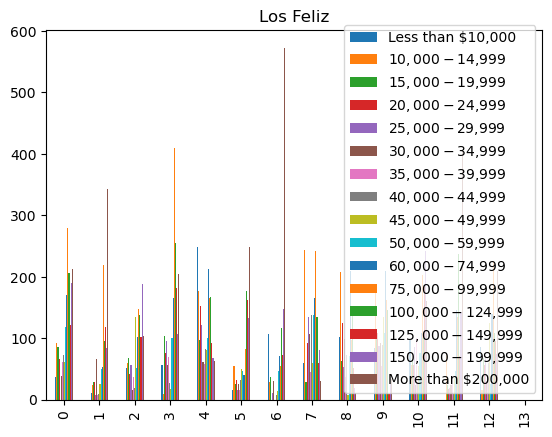

In [23]:
df2.plot.bar(title = "Los Feliz")

In [24]:
# Want to create a total households population
df3 = ['Less than $10,000',
'$10,000-$14,999',
'$15,000-$19,999',
'$20,000-$24,999',
'$25,000-$29,999',
'$30,000-$34,999',
'$35,000-$39,999',
'$40,000-$44,999',
'$45,000-$49,999',
'$50,000-$59,999',
'$60,000-$74,999',
'$75,000-$99,999',
'$100,000-$124,999',
'$125,000-$149,999',
'$150,000-$199,999',
'More than $200,000']

In [25]:
df2['TotalPop'] = df2[df3].sum(axis = 1)
df2.head(3)

/tmp/ipykernel_647/337586398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TotalPop'] = df2[df3].sum(axis = 1)


,FIPS,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000",TotalPop
0,06037188201,37,92,86,66,0,38,61,72,61,118,170,280,206,121,190,213,1811
1,06037188202,11,24,28,29,8,66,8,9,26,50,53,219,95,118,84,343,1171
2,06037189101,51,60,68,41,56,16,37,19,135,52,102,148,137,102,188,104,1316


In [26]:
# Notice that the SE_A14001_001 is household number of resondents by census tract
df3 = pd.read_csv("data/LF/R13296612_SL140.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df3.head(5)

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATECE,Geo_STATE,Geo_COUNTY,Geo_COUSUB,Geo_PLACE,Geo_PLACESE,Geo_TRACT,Geo_BLKGRP,Geo_CONCIT,Geo_AIANHH,Geo_AIANHHFP,Geo_AIHHTLI,Geo_AITSCE,Geo_AITS,Geo_ANRC,Geo_CBSA,Geo_CSA,Geo_METDIV,Geo_MACC,Geo_MEMI,Geo_NECTA,Geo_CNECTA,Geo_NECTADIV,Geo_UA,Geo_UACP,Geo_CDCURR,Geo_SLDU,Geo_SLDL,Geo_VTD,Geo_ZCTA3,Geo_ZCTA5,Geo_SUBMCD,Geo_SDELM,Geo_SDSEC,Geo_SDUNI,Geo_UR,Geo_PCI,Geo_TAZ,Geo_UGA,Geo_BTTR,Geo_BTBG,Geo_PUMA5,Geo_PUMA1,SE_A14001_001,SE_A14001_002,SE_A14001_003,SE_A14001_004,SE_A14001_005,SE_A14001_006,SE_A14001_007,SE_A14001_008,SE_A14001_009,SE_A14001_010,SE_A14001_011,SE_A14001_012,SE_A14001_013,SE_A14001_014,SE_A14001_015,SE_A14001_016,SE_A14001_017,PCT_SE_A14001_002,PCT_SE_A14001_003,PCT_SE_A14001_004,PCT_SE_A14001_005,PCT_SE_A14001_006,PCT_SE_A14001_007,PCT_SE_A14001_008,PCT_SE_A14001_009,PCT_SE_A14001_010,PCT_SE_A14001_011,PCT_SE_A14001_012,PCT_SE_A14001_013,PCT_SE_A14001_014,PCT_SE_A14001_015,PCT_SE_A14001_016,PCT_SE_A14001_017
0,6037188201,14000US06037188201,Census Tract 1882.01,"Census Tract 1882.01, Los Angeles County, Cali...",ca,140,0,ACSSF,4266,NaN,NaN,NaN,NaN,6,37,NaN,NaN,NaN,188201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1811,37,92,86,66,0,38,61,72,61,118,170,280,206,121,190,213,2.04,5.08,4.75,3.64,0.00,2.10,3.37,3.98,3.37,6.52,9.39,15.46,11.37,6.68,10.49,11.76
1,6037188202,14000US06037188202,Census Tract 1882.02,"Census Tract 1882.02, Los Angeles County, Cali...",ca,140,0,ACSSF,4267,NaN,NaN,NaN,NaN,6,37,NaN,NaN,NaN,188202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1171,11,24,28,29,8,66,8,9,26,50,53,219,95,118,84,343,0.94,2.05,2.39,2.48,0.68,5.64,0.68,0.77,2.22,4.27,4.53,18.70,8.11,10.08,7.17,29.29
2,6037189101,14000US06037189101,Census Tract 1891.01,"Census Tract 1891.01, Los Angeles County, Cali...",ca,140,0,ACSSF,4269,NaN,NaN,NaN,NaN,6,37,NaN,NaN,NaN,189101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1316,51,60,68,41,56,16,37,19,135,52,102,148,137,102,188,104,3.88,4.56,5.17,3.12,4.26,1.22,2.81,1.44,10.26,3.95,7.75,11.25,10.41,7.75,14.29,7.90
3,6037189102,14000US06037189102,Census Tract 1891.02,"Census Tract 1891.02, Los Angeles County, Cali...",ca,140,0,ACSSF,4270,NaN,NaN,NaN,NaN,6,37,NaN,NaN,NaN,189102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1934,56,9,103,76,96,57,70,27,17,100,166,410,254,182,106,205,2.90,0.47,5.33,3.93,4.96,2.95,3.62,1.40,0.88,5.17,8.58,21.20,13.13,9.41,5.48,10.60
4,6037189201,14000US06037189201,Census Tract 1892.01,"Census Tract 1892.01, Los Angeles County, Cali...",ca,140,0,ACSSF,4271,NaN,NaN,NaN,NaN,6,37,NaN,NaN,NaN,189201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1943,248,176,97,152,121,61,58,82,81,100,213,165,167,92,67,63,12.76,9.06,4.99,7.82,6.23,3.14,2.99,4.22,4.17,5.15,10.96,8.49,8.59,4.73,3.45,3.24


In [27]:
df_householdsize = df3['SE_A14001_001']
df_householdsize.sample(10)

3     1934
10    1645
6     1315
13       0
5     1153
2     1316
11    1411
7     1756
4     1943
9     1629
Name: SE_A14001_001, dtype: int64

In [28]:
df_householdsize.describe()

count      14.000000
mean     1419.214286
std       486.140875
min         0.000000
25%      1315.250000
50%      1415.000000
75%      1728.250000
max      1943.000000
Name: SE_A14001_001, dtype: float64

In [29]:
# Creating a poverty column variable 
df2['poverty'] = df2['Less than $10,000'] + df2['$10,000-$14,999'] + df2['$15,000-$19,999'] + df2['$20,000-$24,999'] 
df2.sample(5)

/tmp/ipykernel_647/3305094393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['poverty'] = df2['Less than $10,000'] + df2['$10,000-$14,999'] + df2['$15,000-$19,999'] + df2['$20,000-$24,999']


,FIPS,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000",TotalPop,poverty
1,06037188202,11,24,28,29,8,66,8,9,26,50,53,219,95,118,84,343,1171,92
3,06037189102,56,9,103,76,96,57,70,27,17,100,166,410,254,182,106,205,1934,244
7,06037190401,60,243,29,92,134,107,44,138,60,138,166,241,135,59,80,30,1756,424
11,06037195202,0,75,23,17,19,23,26,9,35,47,145,135,237,71,142,407,1411,115
5,06037189202,15,54,25,31,16,25,16,32,50,46,40,83,176,162,133,249,1153,125


In [30]:
#Creating a poverty and total population to get a percent 
df2['p_poverty'] = df2['poverty']/df2['TotalPop']*100
df2.sample(10)

/tmp/ipykernel_647/3666134208.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['p_poverty'] = df2['poverty']/df2['TotalPop']*100


,FIPS,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000",TotalPop,poverty,p_poverty
3,06037189102,56,9,103,76,96,57,70,27,17,100,166,410,254,182,106,205,1934,244,12.616339
12,06037195300,86,16,68,56,67,30,37,60,124,25,139,225,108,95,74,209,1419,226,15.926709
6,06037189300,106,28,36,0,11,30,0,8,14,47,71,55,116,72,148,573,1315,170,12.927757
9,06037191201,84,181,106,108,87,92,55,89,134,108,210,162,145,9,26,33,1629,479,29.404543
5,06037189202,15,54,25,31,16,25,16,32,50,46,40,83,176,162,133,249,1153,125,10.841284
10,06037195201,99,56,63,56,85,23,100,29,55,75,108,203,105,185,242,161,1645,274,16.656535
1,06037188202,11,24,28,29,8,66,8,9,26,50,53,219,95,118,84,343,1171,92,7.856533
2,06037189101,51,60,68,41,56,16,37,19,135,52,102,148,137,102,188,104,1316,220,16.717325
11,06037195202,0,75,23,17,19,23,26,9,35,47,145,135,237,71,142,407,1411,115,8.150248
13,06037980009,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


<AxesSubplot: ylabel='Frequency'>

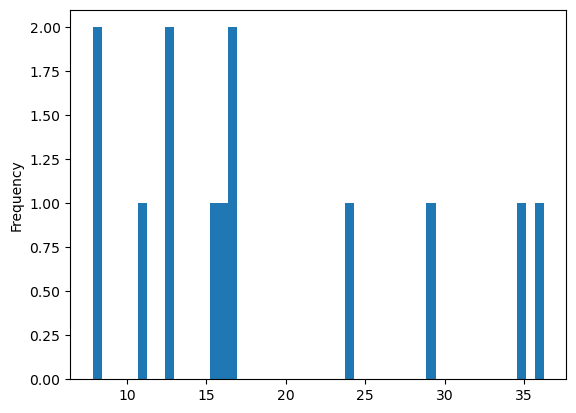

In [31]:
df2['p_poverty'].plot.hist(bins=50)

In [32]:
# top 10 census of households income that live in poverty. 
df_sorted = df2.sort_values(by='p_poverty',ascending = False)
df_sorted[['FIPS','p_poverty']].head(10)

,FIPS,p_poverty
8,06037190402,36.237189
4,06037189201,34.637159
9,06037191201,29.404543
7,06037190401,24.145786
2,06037189101,16.717325
10,06037195201,16.656535
12,06037195300,15.926709
0,06037188201,15.516289
6,06037189300,12.927757
3,06037189102,12.616339


<AxesSubplot: xlabel='FIPS'>

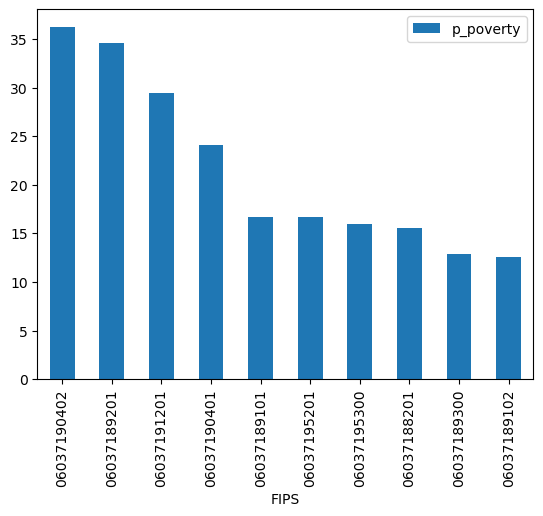

In [33]:
df_sorted.head(10).plot.bar(x='FIPS',
                            y='p_poverty')

<AxesSubplot: title={'center': 'Census Tract where Los Feliz has more poverty'}, ylabel='FIPS'>

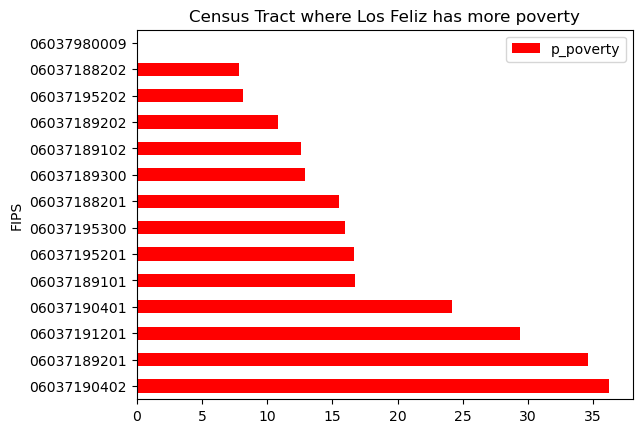

In [41]:
df_sorted.head(30).plot.barh(x='FIPS',  # barh turns the plot direction 
                            y='p_poverty', 
                            title='Census Tract where Los Feliz has more poverty',
                            color='red')

In [40]:
# Import geojson file of LA County
tracts=gpd.read_file('data/LF/Census_Tracts_2020.geojson')
tracts.head(2)

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."


In [36]:
tracts['FIPS'] ='06' + '037' + tracts['CT20']

In [37]:
tracts=tracts.merge(df2, on="FIPS")

In [38]:
tracts.head(3)

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry,FIPS,"Less than $10,000","$10,000-$14,999","$15,000-$19,999","$20,000-$24,999","$25,000-$29,999","$30,000-$34,999","$35,000-$39,999","$40,000-$44,999","$45,000-$49,999","$50,000-$59,999","$60,000-$74,999","$75,000-$99,999","$100,000-$124,999","$125,000-$149,999","$150,000-$199,999","More than $200,000",TotalPop,poverty,p_poverty
0,435,188201,1882.01,8.354826e+06,17041.606203,"POLYGON ((-118.26762 34.11247, -118.26773 34.1...",06037188201,37,92,86,66,0,38,61,72,61,118,170,280,206,121,190,213,1811,281,15.516289
1,436,188202,1882.02,8.177322e+06,11794.883592,"POLYGON ((-118.28415 34.11250, -118.28309 34.1...",06037188202,11,24,28,29,8,66,8,9,26,50,53,219,95,118,84,343,1171,92,7.856533
2,438,189101,1891.01,4.254115e+06,8256.537441,"POLYGON ((-118.28743 34.10769, -118.28889 34.1...",06037189101,51,60,68,41,56,16,37,19,135,52,102,148,137,102,188,104,1316,220,16.717325


<AxesSubplot: >

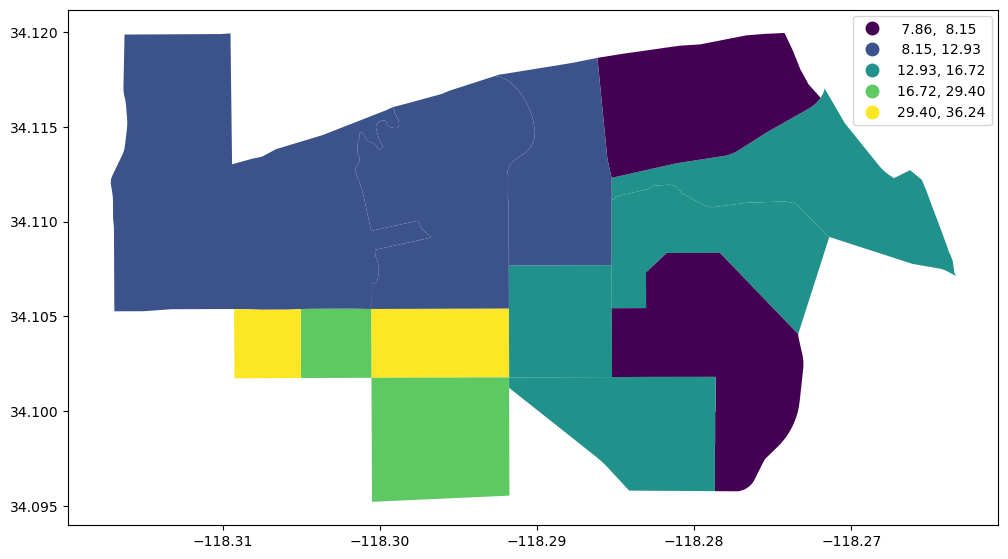

In [39]:
# scheme='NaturalBreaks'
tracts.plot(figsize=(12,10),
                 column='p_poverty',
                 legend=True, 
                 scheme='NaturalBreaks')